In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Preparation. Use Five point summary to perform Descriptive Analysis on the data.

In [3]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',1)

In [4]:
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
df.shape

(5000, 14)

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
## Drop ID and Zip Code column as they may not be useful for our analysis
df.drop(['ID','ZIP Code'], axis = 1, inplace=True)

In [8]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [9]:
import plotly.express as px

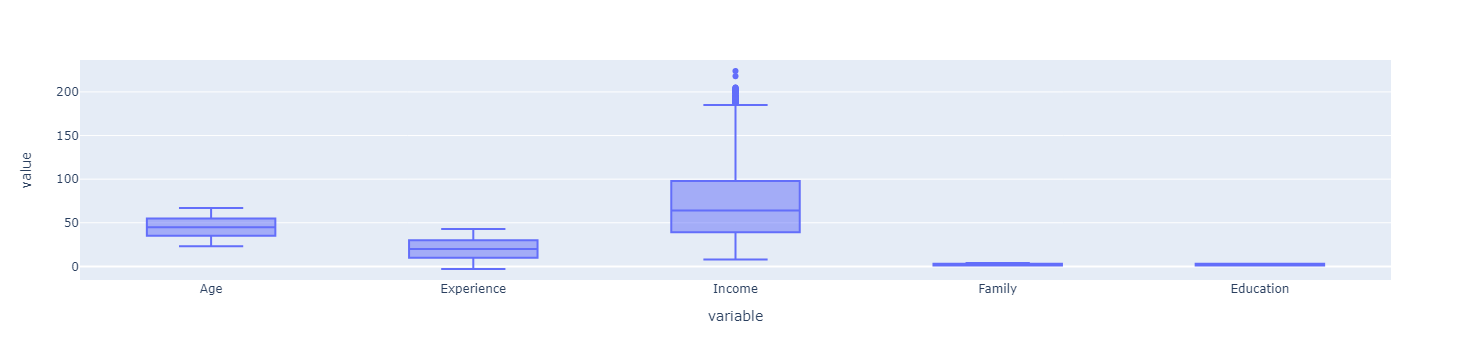

In [10]:
fig = px.box(df,y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()
#The figure shows Min, Max, Mean and std deviation for key attributes of the dataset.

**Five point summary suggest that Experience has negative value(This should be fixed). Income has too much noise and slightly skewed right, Age and experience are equally distributed.

## Step2: Visualize data distribution 

In [11]:
# Check data skewness
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

*Income has highest skewness, contains high positive outliers in the data.Age and Experience contain small number of low outliers.

In [12]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

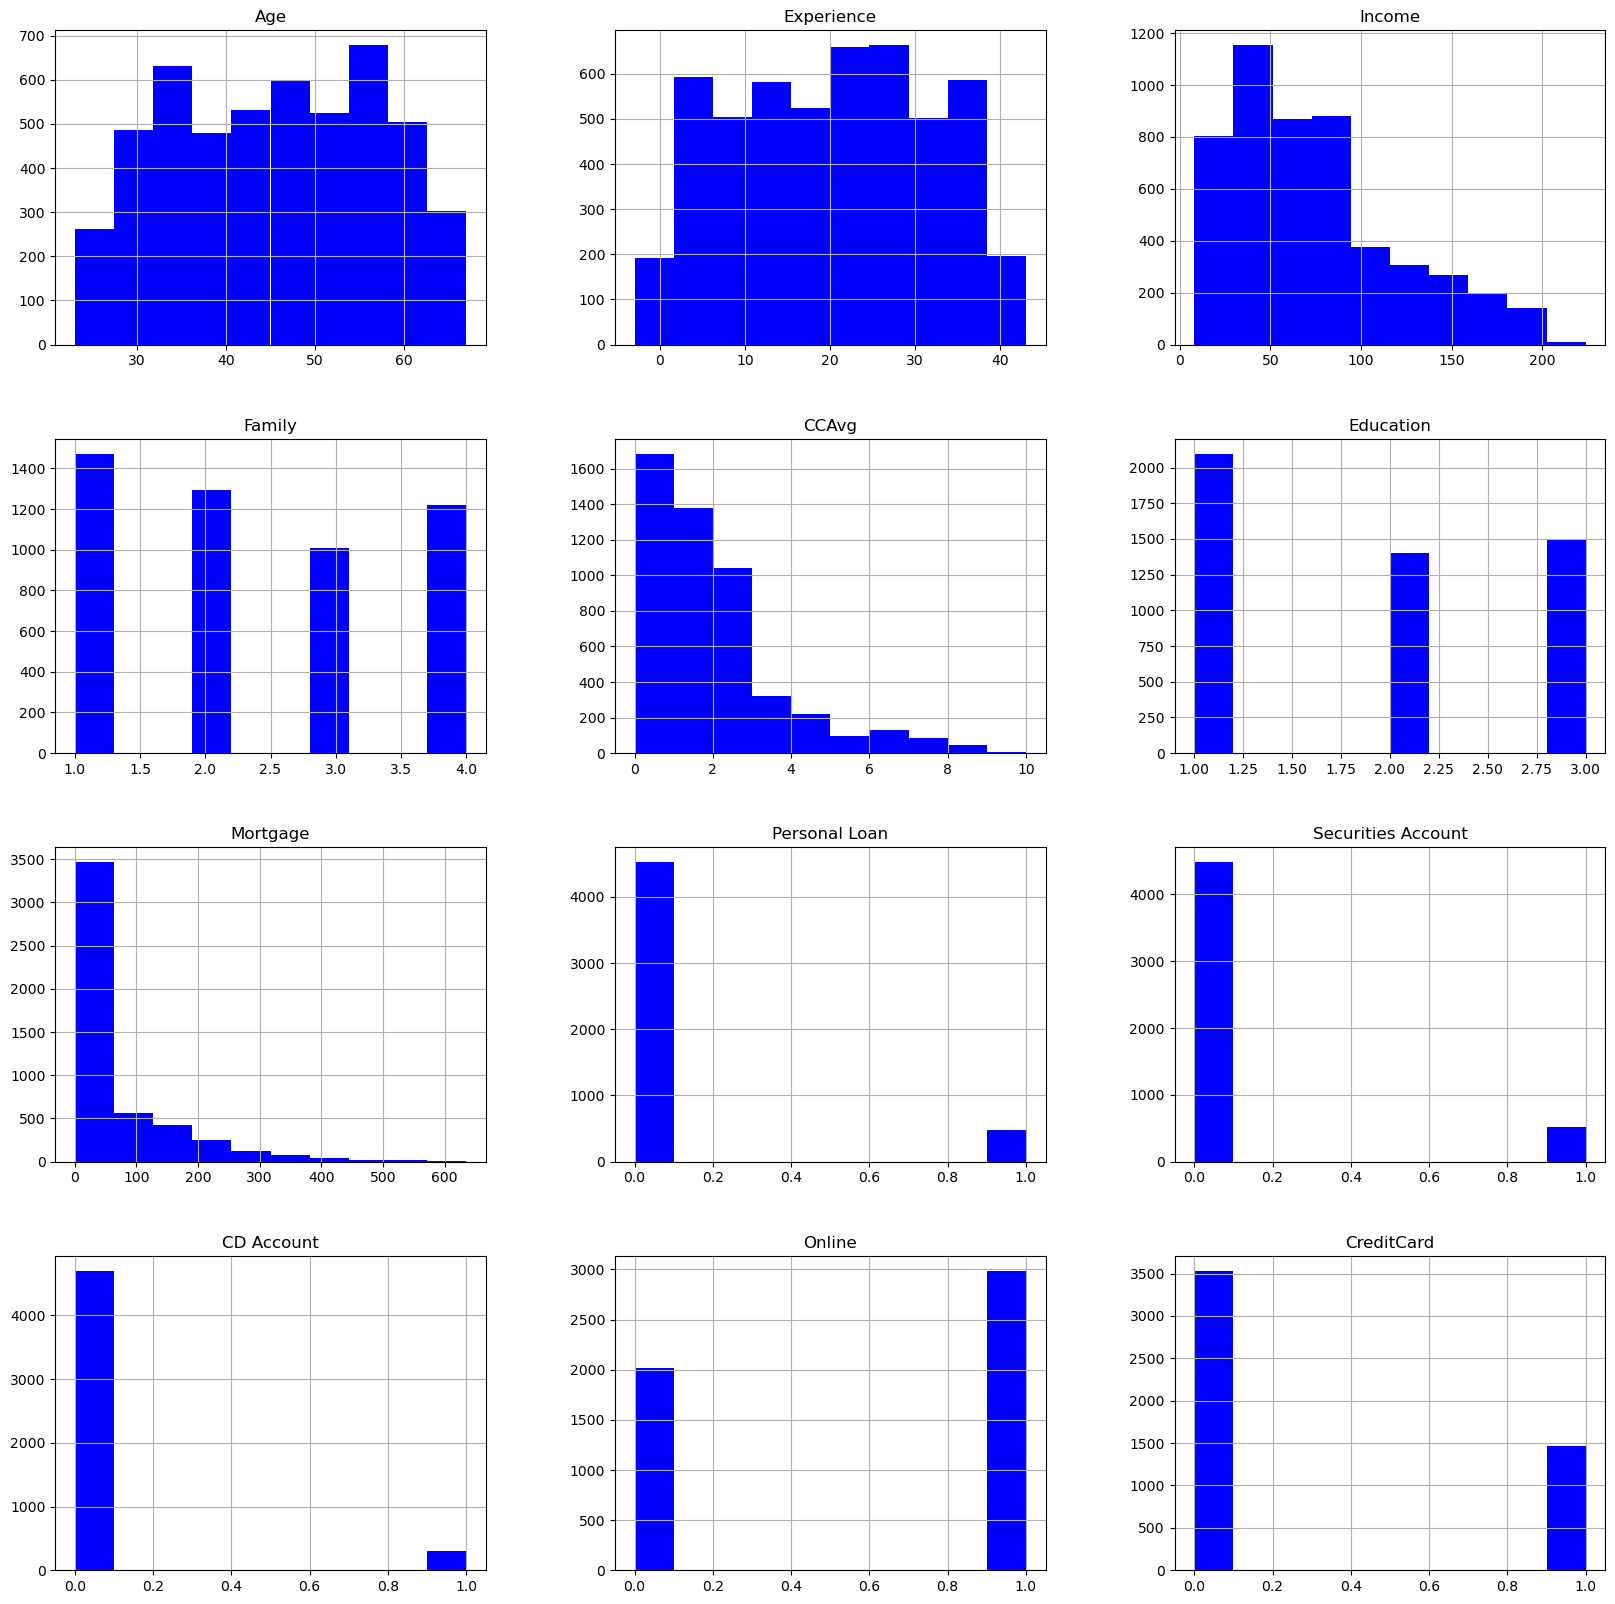

In [13]:
# Visualize data distribution: age and experience are equally distributed, income and CCavg are skewed to the left.
df.hist(figsize=(20,20), color='blue')

C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\1339895931.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

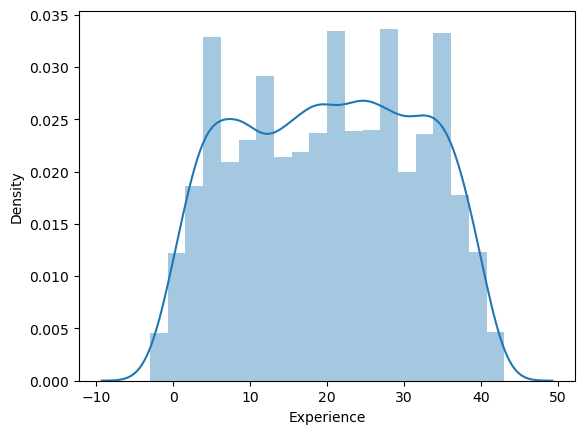

In [14]:
# Visualize distribution of "experience'
sns.distplot(df['Experience'])

In [15]:
df['Experience'].mean()

20.1046

In [16]:
Negative_exp = df[df['Experience']<0]
Negative_exp.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
89    25          -1     113       4   2.30          3         0   
226   24          -1      39       2   1.70          2         0   
315   24          -2      51       3   0.30          3         0   
451   28          -2      48       2   1.75          3        89   
524   24          -1      75       4   0.20          1         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
89               0                   0           0       0           1  
226              0                   0           0       0           0  
315              0                   0           0       1           0  
451              0                   0           0       1           0  
524              0                   0           0       1           0

C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\4112762209.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

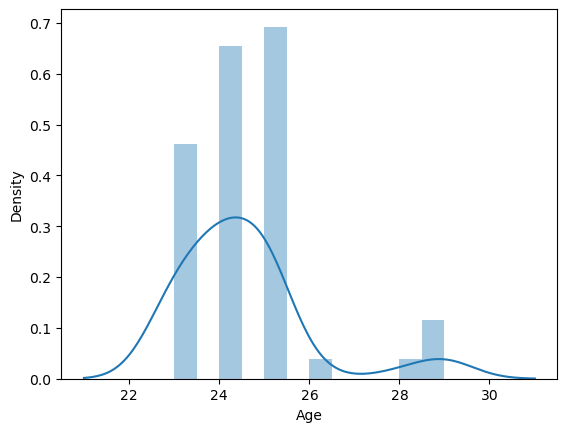

In [17]:
# Visualize distribution of the age of people who have negative experience
sns.distplot(Negative_exp['Age'])

In [18]:
Negative_exp['Age'].mean()

24.51923076923077

In [19]:
Negative_exp['Experience'].mean()

-1.4423076923076923

In [20]:
Negative_exp.size

624

In [21]:
print('Among 5000 data entries, there are {} record with neg experience, approximately {} %'.format(Negative_exp.size,(Negative_exp.size/df.size)*100))

Among 5000 data entries, there are 624 record with neg experience, approximately 1.04 %


In [22]:
data = df.copy()

In [23]:
data.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [24]:
#Replace neg experience values with the mean value of experience
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [25]:
data[data['Experience']<0]

Empty DataFrame
Columns: [Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

## Step 3: Analyze Customer's education status
* Check Correlation of the data


In [26]:
df.corr()

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.994215 -0.055269 -0.046418 -0.052030   
Experience          0.994215    1.000000 -0.046574 -0.052563 -0.050089   
Income             -0.055269   -0.046574  1.000000 -0.157501  0.645993   
Family             -0.046418   -0.052563 -0.157501  1.000000 -0.109285   
CCAvg              -0.052030   -0.050089  0.645993 -0.109285  1.000000   
Education           0.041334    0.013152 -0.187524  0.064929 -0.136138   
Mortgage           -0.012539   -0.010582  0.206806 -0.020445  0.109909   
Personal Loan      -0.007726   -0.007413  0.502462  0.061367  0.366891   
Securities Account -0.000436   -0.001232 -0.002616  0.019994  0.015087   
CD Account          0.008043    0.010353  0.169738  0.014110  0.136537   
Online              0.013702    0.013898  0.014206  0.010354 -0.003620   
CreditCard          0.007681    0.008967 -0.002385  0.011588 -0.006686   

                    Education  Mortgage  Personal Loan  Securities Account  \
Age                  0.041334 -0.012539      -0.007726           -0.000436   
Experience           0.013152 -0.010582      -0.007413           -0.001232   
Income              -0.187524  0.206806       0.502462           -0.002616   
Family               0.064929 -0.020445       0.061367            0.019994   
CCAvg               -0.136138  0.109909       0.366891            0.015087   
Education            1.000000 -0.033327       0.136722           -0.010812   
Mortgage            -0.033327  1.000000       0.142095           -0.005411   
Personal Loan        0.136722  0.142095       1.000000            0.021954   
Securities Account  -0.010812 -0.005411       0.021954            1.000000   
CD Account           0.013934  0.089311       0.316355            0.317034   
Online              -0.015004 -0.005995       0.006278            0.012627   
CreditCard          -0.011014 -0.007231       0.002802           -0.015028   

                    CD Account    Online  CreditCard  
Age                   0.008043  0.013702    0.007681  
Experience            0.010353  0.013898    0.008967  
Income                0.169738  0.014206   -0.002385  
Family                0.014110  0.010354    0.011588  
CCAvg                 0.136537 -0.003620   -0.006686  
Education             0.013934 -0.015004   -0.011014  
Mortgage              0.089311 -0.005995   -0.007231  
Personal Loan         0.316355  0.006278    0.002802  
Securities Account    0.317034  0.012627   -0.015028  
CD Account            1.000000  0.175880    0.278644  
Online                0.175880  1.000000    0.004210  
CreditCard            0.278644  0.004210    1.000000

<Axes: >

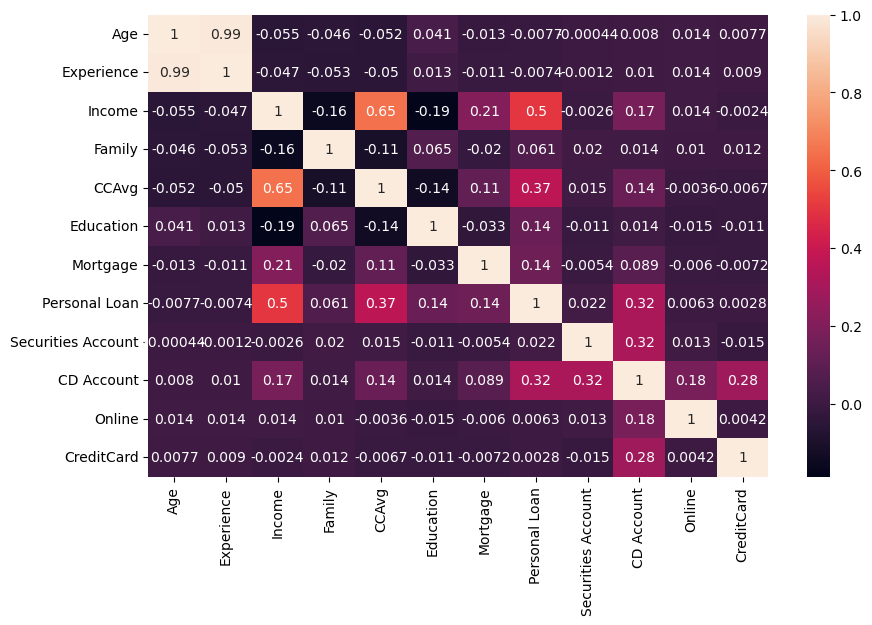

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

Age and experience are highly correlated. Therefore we will go with "age" and drop"experience" to avoid multicollinearity issue.

In [28]:
data=data.drop(['Experience'],axis=1)

In [29]:
data.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

* Analyze education status of the customers who are applying for the loan in the bank
Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

In [30]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [31]:
def mark(x):
    if x==1:
        return "Undergraduate"
    elif x==2:
        return "Graduate"
    else:
        return "Advanced/Professional"
    

In [32]:
data['Edu_mark']=data['Education'].apply(mark)

In [33]:
data.head(5)

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard       Edu_mark  
0                   1           0       0           0  Undergraduate  
1                   1           0       0           0  Undergraduate  
2                   0           0       0           0  Undergraduate  
3                   0           0       0           0       Graduate  
4                   0           0       0           1       Graduate

In [34]:
EDU_dis=data.groupby('Edu_mark')['Age'].count()

In [35]:
EDU_dis

Edu_mark
Advanced/Professional    1501
Graduate                 1403
Undergraduate            2096
Name: Age, dtype: int64

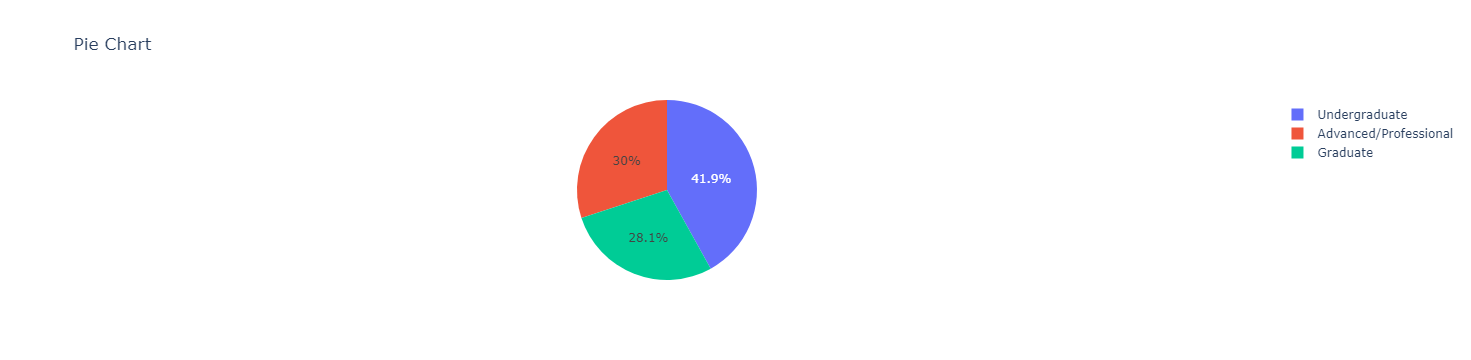

In [36]:
fig =px.pie(data, values=EDU_dis, names=EDU_dis.index, title='Pie Chart')
fig.show()

## Step 4: Explore the account holder distribution

In [37]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark'],
      dtype='object')

In [38]:
def Security_CD(row):
    if(row['Securities Account']==1)& (row['CD Account']==1):
        return 'Holds Securities & Deposit'
    elif (row['Securities Account']==0)& (row['CD Account']==0):
        return 'Does not hold Securities or Deposit'
    elif (row['Securities Account']==1)& (row['CD Account']==0):
        return 'Holds only Securities'
    else:
        return 'Holds only Deposit'                           

In [39]:
data['Account_holder_category']=data.apply(Security_CD, axis=1)

In [40]:
data.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard       Edu_mark  \
0                   1           0       0           0  Undergraduate   
1                   1           0       0           0  Undergraduate   
2                   0           0       0           0  Undergraduate   
3                   0           0       0           0       Graduate   
4                   0           0       0           1       Graduate   

               Account_holder_category  
0                Holds only Securities  
1                Holds only Securities  
2  Does not hold Securities or Deposit  
3  Does not hold Securities or Deposit  
4  Does not hold Securities or Deposit

In [41]:
values= data['Account_holder_category'].value_counts()
values.index

Index(['Does not hold Securities or Deposit', 'Holds only Securities',
       'Holds only Deposit', 'Holds Securities & Deposit'],
      dtype='object')

In [42]:
values

Does not hold Securities or Deposit    4323
Holds only Securities                   375
Holds only Deposit                      155
Holds Securities & Deposit              147
Name: Account_holder_category, dtype: int64

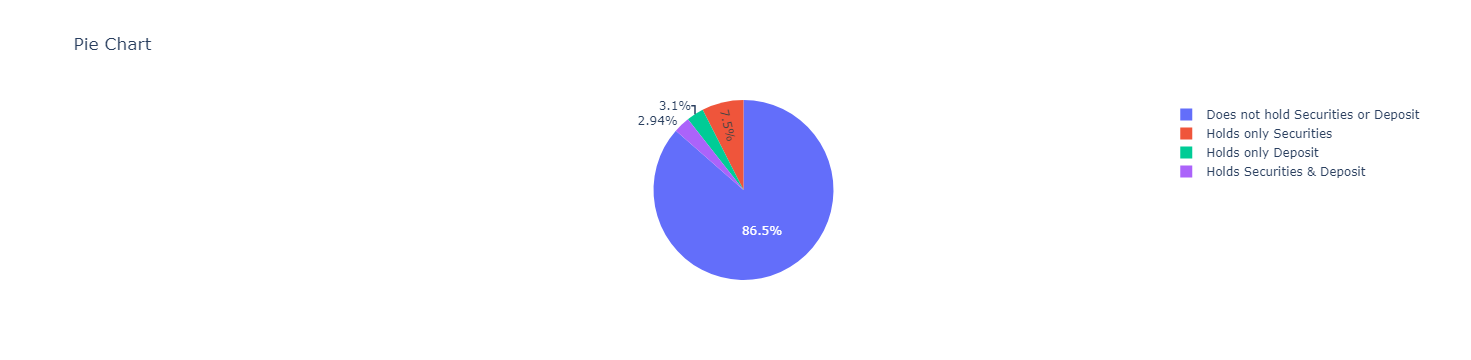

In [43]:
fig =px.pie(data, values=values, names=values.index, title='Pie Chart')
fig.show()

## Step 5: Analyse customer on the the basis of their education status, income and personal loan status

In [44]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

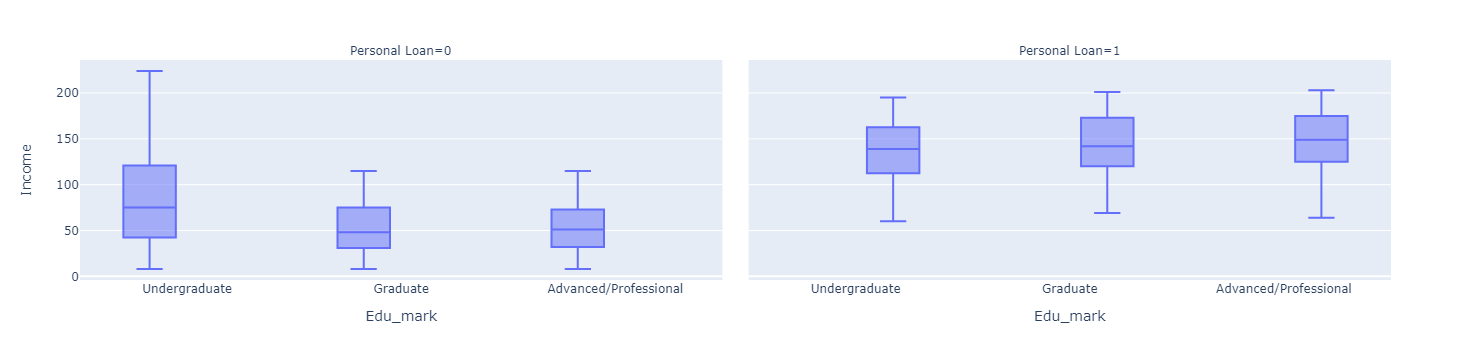

In [45]:
px.box(data,x='Edu_mark',y='Income',facet_col='Personal Loan')

C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\1103463535.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\1103463535.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




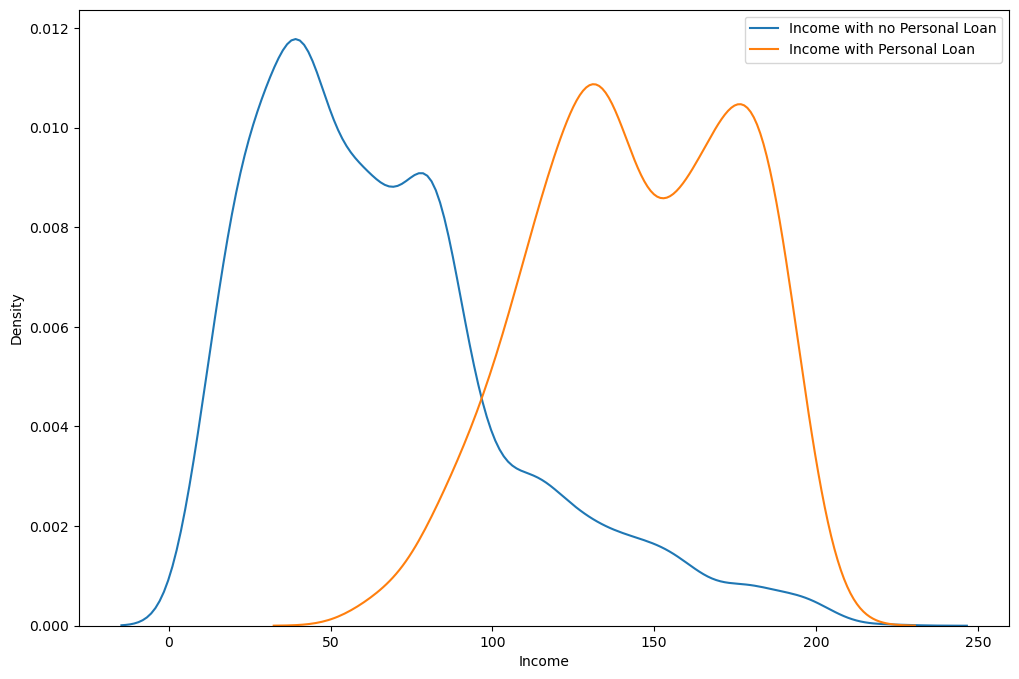

In [46]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan']==0]['Income'], hist=False, label='Income with no Personal Loan')
sns.distplot(data[data['Personal Loan']==1]['Income'], hist=False, label='Income with Personal Loan')
plt.legend()

People who have personal loan seems to have higher income than people with no personal loan

In [47]:
## Automate the analysis
def plot(col1,col2,label1, label2, title):
    plt.figure(figsize=(12,8))
    sns.distplot(data[data[col2]==0][col1], hist=False, label=label1)
    sns.distplot(data[data[col2]==1][col1], hist=False, label=label2)
    plt.legend()
    plt.title(title)

C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\517357846.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\517357846.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




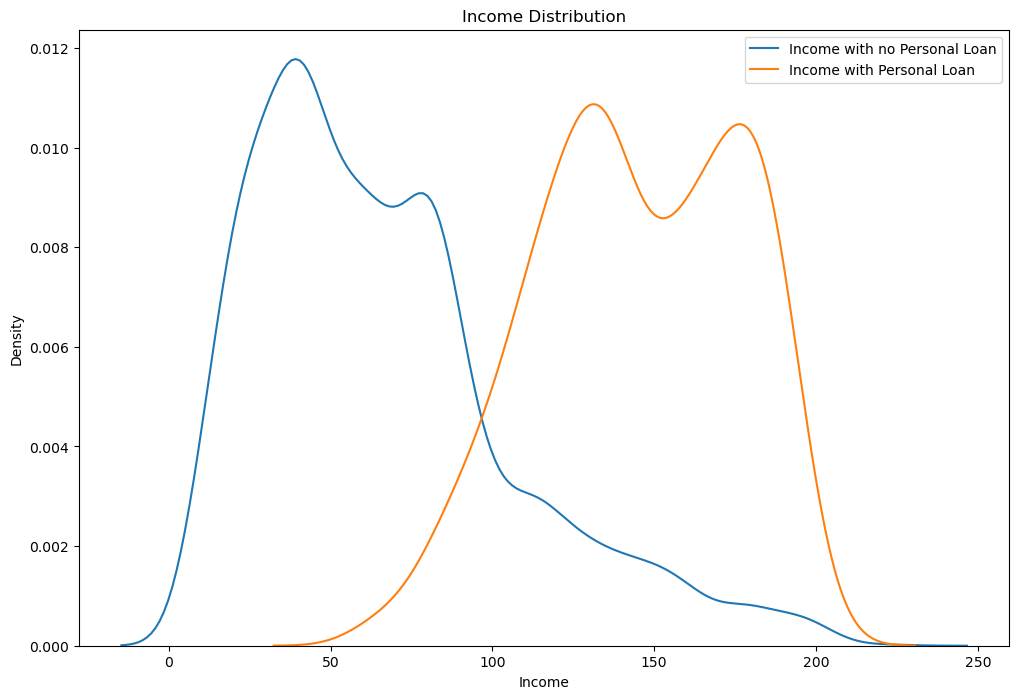

In [48]:
plot('Income','Personal Loan','Income with no Personal Loan','Income with Personal Loan', 'Income Distribution')

C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\517357846.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\517357846.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




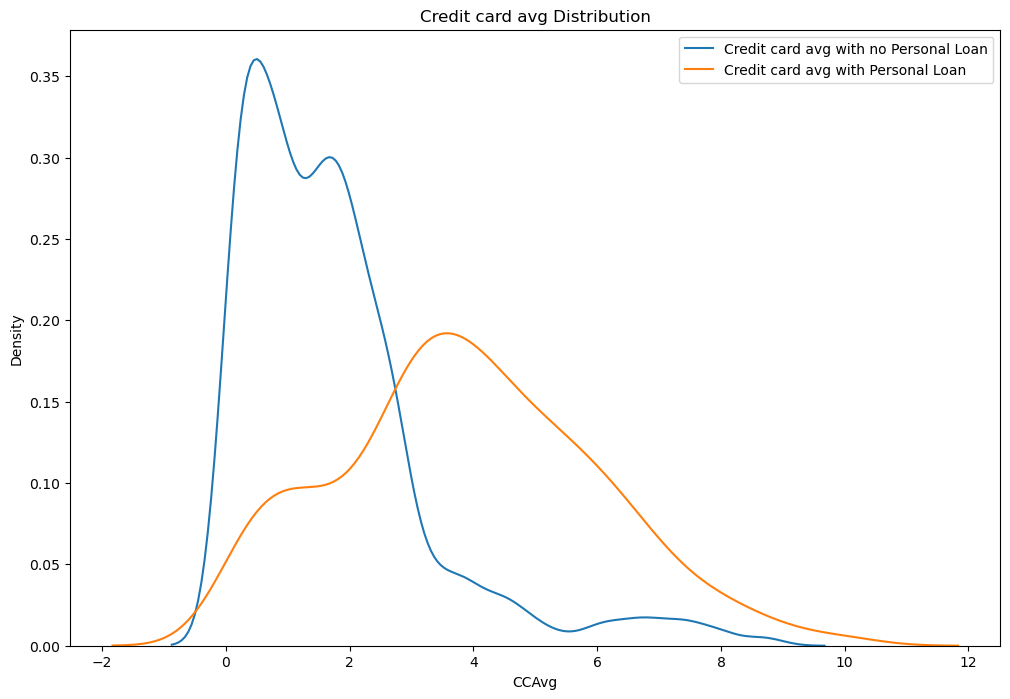

In [49]:
plot('CCAvg','Personal Loan','Credit card avg with no Personal Loan','Credit card avg with Personal Loan', 'Credit card avg Distribution')

C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\517357846.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Nhung\AppData\Local\Temp\ipykernel_11204\517357846.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




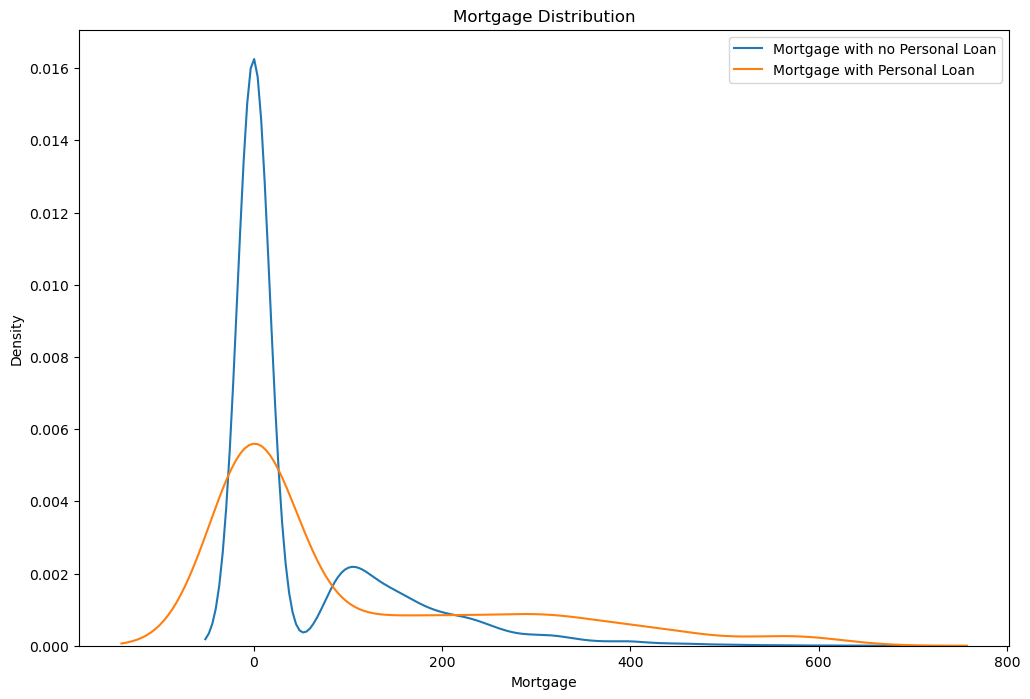

In [50]:
plot('Mortgage','Personal Loan','Mortgage with no Personal Loan','Mortgage with Personal Loan', 'Mortgage Distribution')

## Step 6: Analyze customer behavior on the basis of Security account, Online, Account holder category & credit card...

In [51]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [52]:
col_names=['Securities Account','Online', 'Account_holder_category', 'CreditCard']

<Axes: xlabel='Securities Account', ylabel='count'>

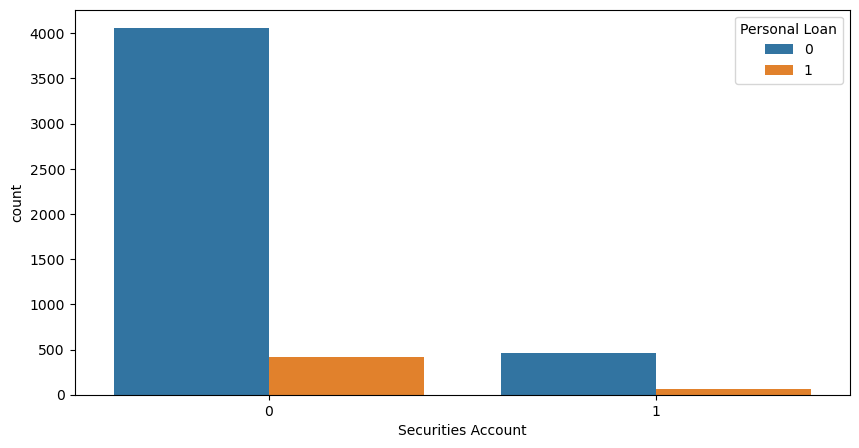

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='Securities Account', hue='Personal Loan', data=data)

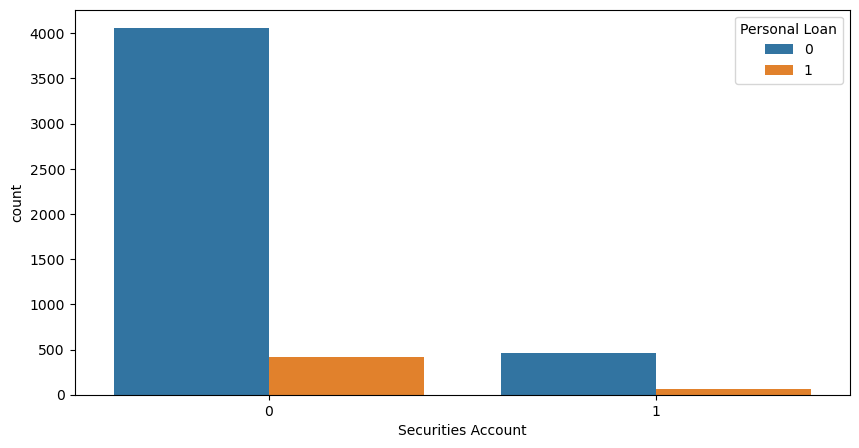

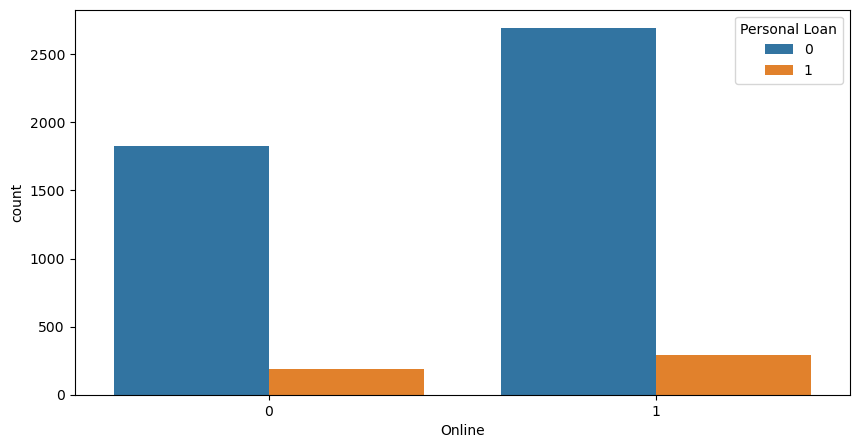

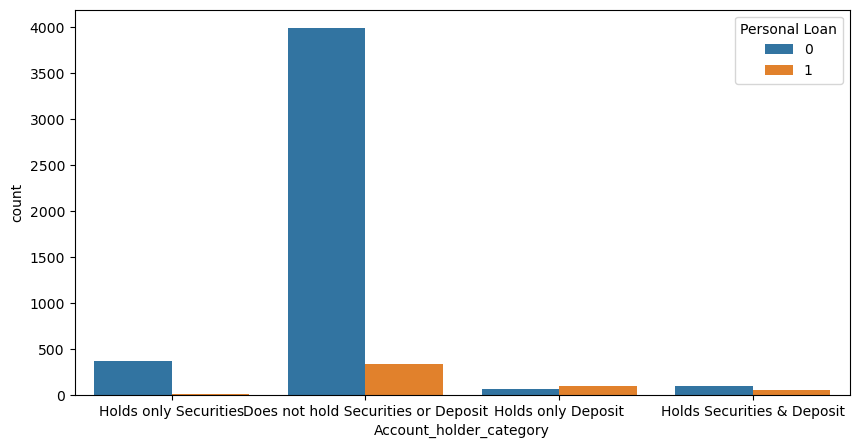

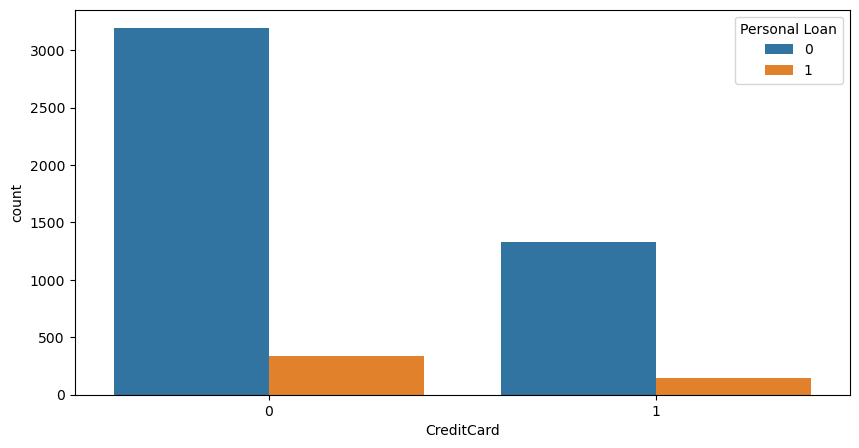

In [54]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, hue='Personal Loan', data=data)

## Step 7: Hypothesis

Hypo 1: How age of a person affect Available Loan?
Hypo 2: Does income have an impact on Available Loan?
Hypo 3: Does family size have an impact on Available Loan?

<Axes: xlabel='Age', ylabel='Personal Loan'>

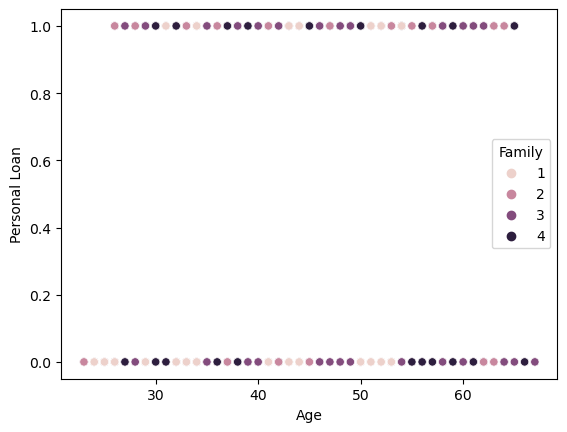

In [55]:
sns.scatterplot(data = data, x='Age',y='Personal Loan',hue=data['Family'])

In [56]:
import scipy.stats as stats

In [57]:
Ho="Age does not have impact on available Personal Loan"
Ha="Age does have impact on available Personal Loan"

In [58]:
Age_no = np.array(data[data['Personal Loan']==0]['Age'])
Age_yes = np.array(data[data['Personal Loan']==1]['Age'])

In [59]:
t,p_value=stats.ttest_ind(Age_no,Age_yes,axis=0)
if p_value<0.05:
    print(Ha,' as the p_value is less than 0.05 with a value of {}'.format(p_value))
else:
    print(Ho,' as the p_value is greater than 0.05 with a value of {}'.format(p_value))

Age does not have impact on available Personal Loan  as the p_value is greater than 0.05 with a value of 0.584959263705325


In [60]:
# Put into a function
def hypothesis(col1, col2, Ho,Ha):
    array1 = np.array(data[data[col1]==0][col2])
    array2  = np.array(data[data[col1]==1][col2])
    t,p_value=stats.ttest_ind(array1,array2,axis=0)
    if p_value<0.05:
        print('{} as the p_value is less than 0.05 with a value of {}'.format(Ha,p_value))
    else:
        print('{} as the p_value is greater than 0.05 with a value of {}'.format(Ho,p_value))
    

In [61]:
hypothesis('Personal Loan','Age',Ho="Age does not have impact on available Personal Loan",Ha="Age does have impact on available Personal Loan")

Age does not have impact on available Personal Loan as the p_value is greater than 0.05 with a value of 0.584959263705325


In [62]:
hypothesis('Personal Loan','Income',Ho="Income does not have impact on available Personal Loan",Ha="Income does have impact on available Personal Loan")

Income does have impact on available Personal Loan as the p_value is less than 0.05 with a value of 0.0


In [63]:
hypothesis('Personal Loan','Family',Ho="Family does not have impact on available Personal Loan",Ha="Family does have impact on available Personal Loan")

Family does have impact on available Personal Loan as the p_value is less than 0.05 with a value of 1.4099040685673807e-05
